# 机器学习100天——第6天：逻辑回归（Linear Regression）

## 第1步：数据预处理
### 导入库

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 导入数据集
<a href = "https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/datasets/Social_Network_Ads.csv">这里</a>获取数据集

In [8]:
dataset = pd.read_csv('/Users/haydenwong/Documents/文件/100-Days-Of-ML-Code-master/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:,4].values

### 将数据集分成训练集和测试集

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


### 特征缩放

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 第二步：逻辑回归模型
该项工作的库将会是一个线性模型库，之所以被称为线性是因为逻辑回归是一个线性分类器，这意味着我们在二维空间中，我们两类用户（购买和不购买）将被一条直线分割。然后导入逻辑回归类。下一步我们将创建该类的对象，它将作为我们训练集的分类器。
### 将逻辑回归应用于训练集

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2', tol=0.01,solver = 'saga')
classifier.fit(X_train, y_train)
print(classifier.coef_)
print(classifier.intercept_)

[[2.0696387  1.09786073]]
[-1.00557862]


## 第3步：预测
### 预测测试集结果

In [54]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


## 第4步：评估预测
我们预测了测试集。 现在我们将评估逻辑回归模型是否正确的学习和理解。因此这个混淆矩阵将包含我们模型的正确和错误的预测。
### 生成混淆矩阵

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cn = accuracy_score(y_test, y_pred)
print(cm)#  C{i, j} 观测值的数目i，但预测值j。.
print(cn)

[[66  2]
 [ 8 24]]
0.9


### 可视化

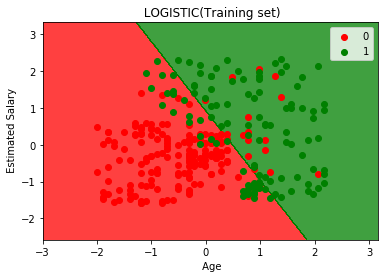

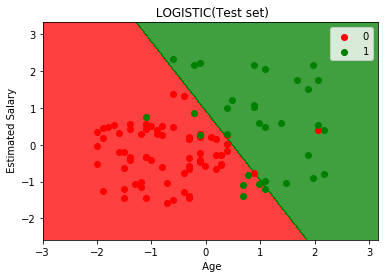

In [56]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

X_set,y_set=X_test,y_test
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Test set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()